**Write a program to implementation of Fuzzy logic-based decision modelling for Railway**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=9737c86a9da4431453901d995cc78b4e9dc8320d3ba3bca838f1235f85d034be
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
Recommended Train Speed: 49.99999999999998


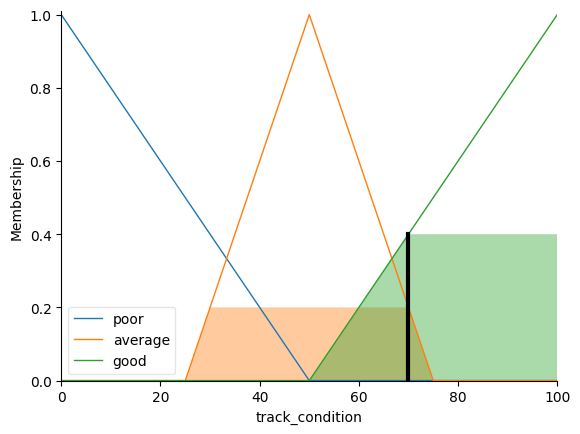

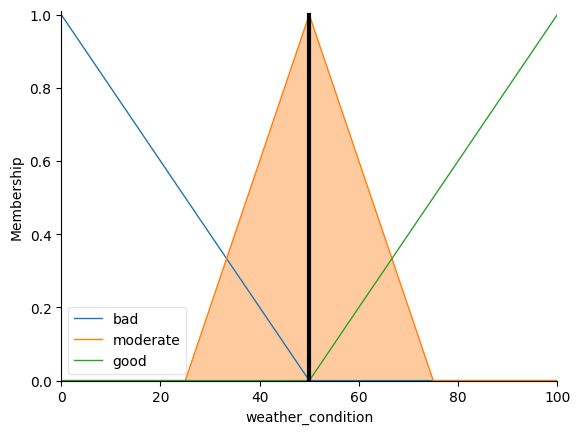

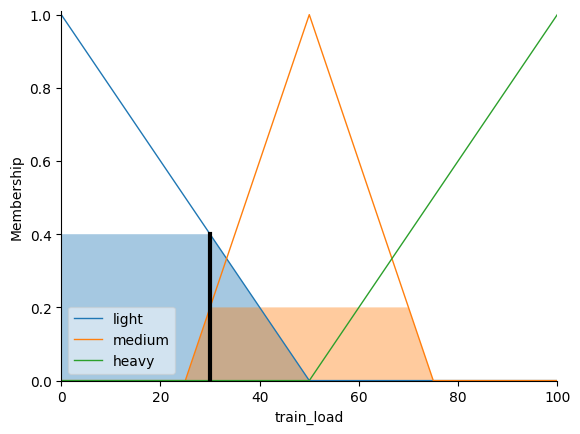

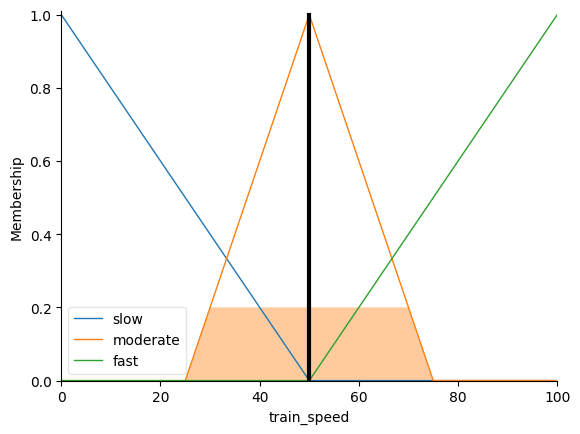

In [1]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define input variables
track_condition = ctrl.Antecedent(np.arange(0, 101, 1), 'track_condition')
weather_condition = ctrl.Antecedent(np.arange(0, 101, 1), 'weather_condition')
train_load = ctrl.Antecedent(np.arange(0, 101, 1), 'train_load')

# Define output variable
train_speed = ctrl.Consequent(np.arange(0, 101, 1), 'train_speed')

# Define membership functions for track condition
track_condition['poor'] = fuzz.trimf(track_condition.universe, [0, 0, 50])
track_condition['average'] = fuzz.trimf(track_condition.universe, [25, 50, 75])
track_condition['good'] = fuzz.trimf(track_condition.universe, [50, 100, 100])

# Define membership functions for weather condition
weather_condition['bad'] = fuzz.trimf(weather_condition.universe, [0, 0, 50])
weather_condition['moderate'] = fuzz.trimf(weather_condition.universe, [25, 50, 75])
weather_condition['good'] = fuzz.trimf(weather_condition.universe, [50, 100, 100])

# Define membership functions for train load
train_load['light'] = fuzz.trimf(train_load.universe, [0, 0, 50])
train_load['medium'] = fuzz.trimf(train_load.universe, [25, 50, 75])
train_load['heavy'] = fuzz.trimf(train_load.universe, [50, 100, 100])

# Define membership functions for train speed
train_speed['slow'] = fuzz.trimf(train_speed.universe, [0, 0, 50])
train_speed['moderate'] = fuzz.trimf(train_speed.universe, [25, 50, 75])
train_speed['fast'] = fuzz.trimf(train_speed.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(track_condition['poor'] & weather_condition['bad'] & train_load['heavy'], train_speed['slow'])
rule2 = ctrl.Rule(track_condition['poor'] & weather_condition['good'] & train_load['light'], train_speed['moderate'])
rule3 = ctrl.Rule(track_condition['average'] & weather_condition['moderate'] & train_load['medium'], train_speed['moderate'])
rule4 = ctrl.Rule(track_condition['good'] & weather_condition['good'] & train_load['light'], train_speed['fast'])
rule5 = ctrl.Rule(track_condition['good'] & weather_condition['bad'] & train_load['heavy'], train_speed['slow'])

# Create control system
train_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
train_sim = ctrl.ControlSystemSimulation(train_ctrl)

# Define inputs
train_sim.input['track_condition'] = 70
train_sim.input['weather_condition'] = 50
train_sim.input['train_load'] = 30

# Compute the train speed
train_sim.compute()

# Print the result
print("Recommended Train Speed:", train_sim.output['train_speed'])

# Optional: Visualize the results
track_condition.view(sim=train_sim)
weather_condition.view(sim=train_sim)
train_load.view(sim=train_sim)
train_speed.view(sim=train_sim)

# Show the plots
plt.show()
